# Импорт библиотек

In [69]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.manifold import TSNE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical

# Предобработка аудио


*   кодирование данных
*   стандартизация



In [72]:
sample_rate = 16000
N_MFCC = 40

def extract_mfcc(file_path):
    audio, sr = librosa.load(file_path, sr=sample_rate)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=N_MFCC)
    return np.mean(mfccs.T, axis=0)

def process_folder(dataset_path, label):
    features = []
    labels = []
    label_path = os.path.join(dataset_path, label)
    if os.path.isdir(label_path):
        for file in os.listdir(label_path):
            file_path = os.path.join(label_path, file)
            mfcc = extract_mfcc(file_path)
            if mfcc is not None:
                features.append(mfcc)
                labels.append(label)
    return features, labels

def load_data(dataset_path):
    features, labels = [], []
    for label in ["yes", "no"]:
        f, l = process_folder(dataset_path, label)
        features.extend(f)
        labels.extend(l)
    return np.array(features), np.array(labels)


dataset_path = "/content/drive/MyDrive/speech"
X, y = load_data(dataset_path)

In [73]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_one_hot = to_categorical(y_encoded)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

In [75]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 16s 61ms/step - accuracy: 0.5409 - loss: 0.6889 - val_accuracy: 0.5798 - val_loss: 0.6760
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.5722 - loss: 0.6749 - val_accuracy: 0.5811 - val_loss: 0.6668
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.5746 - loss: 0.6733 - val_accuracy: 0.5767 - val_loss: 0.6685
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - accuracy: 0.5915 - loss: 0.6674 - val_accuracy: 0.5999 - val_loss: 0.6587
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.5956 - loss: 0.6593 - val_accuracy: 0.6180 - val_loss: 0.6596
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.6038 - loss: 0.6673 - val_accuracy: 0.6130 - val_loss: 0.6461
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.6137 - loss: 0.6577 - val_accuracy: 0.6199 - val_loss: 0.6459
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.6124 - loss: 0.6510 - 

# Сравнение точности модели на train и test

In [78]:
train_acc = history.history['accuracy'][-1]
test_acc = history.history['val_accuracy'][-1]
print(f"Train accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")


Train accuracy: 0.9162
Test accuracy: 0.8979


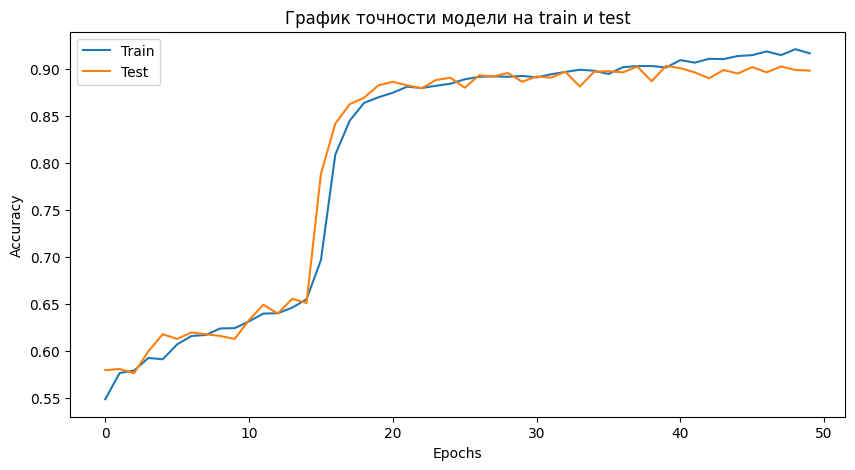

In [83]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('График точности модели на train и test')
plt.show()

# Создание эмбеддингов




In [80]:
embeddings = model.predict(X_test)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step


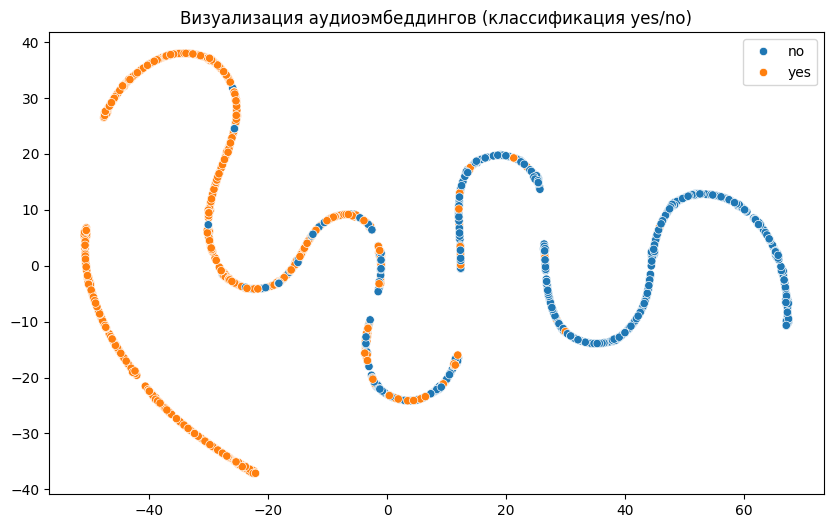

In [85]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=embeddings_2d[:, 0], y=embeddings_2d[:, 1], hue=encoder.inverse_transform(np.argmax(y_test, axis=1)), palette='tab10')
plt.title("Визуализация аудиоэмбеддингов (классификация yes/no)")
plt.show()